# Data Understanding and cleaning

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


Leads = pd.read_csv("Leads.csv")

In [3]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
Leads.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
#check for NA values in dataset
print(Leads.isnull().sum())
print(Leads.isnull().values.any())
print(Leads.isnull().values.sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Checking the percentage of missing values
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
#checking unique values in columns having NAN values greater than 30%
print("Lead Quality" ,Leads['Lead Quality'].unique())
print("Tags" ,Leads['Tags'].unique())
print("Assymetrique Activity Index" ,Leads['Asymmetrique Activity Index'].unique())
print("Assymetrique Profile Index" ,Leads['Asymmetrique Profile Index'].unique())
print("Assymetrique Activity Score" ,Leads['Asymmetrique Activity Score'].unique())
print("Assymetrique Profile Score" ,Leads['Asymmetrique Profile Score'].unique())

Lead Quality ['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance']
Tags ['Interested in other courses' 'Ringing'
 'Will revert after reading the email' nan 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']
Assymetrique Activity Index ['02.Medium' '01.High' '03.Low' nan]
Assymetrique Profile Index ['02.Medium' '01.High' '03.Low' nan]
Assymetrique Activity Score [15. 14. 13. 17. 16. 11. 12. 10.  9.  8. 18. nan  7.]
Assymetrique Profile Score [15. 20. 17. 

In [10]:
#droping columns having NAN values greater than 30%
Leads = Leads.drop(columns=['Lead Quality', 'Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [11]:
#checking unique values in columns having NAN values greater than 10%
print("Converted column unique values are " ,Leads['Converted'].unique())

Converted column unique values are  [0 1]


In [12]:
#creating a new table having converted is 0 
Leads_converted_cold = Leads[Leads.Converted == 0]
Leads_converted_cold.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,NaN,NaN,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,NaN,NaN,No,No,Modified


In [13]:
#creating a new table having converted is 1 
Leads_converted_hot = Leads[Leads.Converted == 1]
Leads_converted_hot.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.00,...,No,No,No,No,No,Select,Other Metro Cities,No,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,No,1,8.0,1343,2.67,...,No,No,No,No,No,Select,Thane & Outskirts,No,Yes,Page Visited on Website


In [14]:
Leads_converted_cold.shape


(5679, 31)

In [15]:
Leads_converted_hot.shape


(3561, 31)

In [16]:
# Checking the percentage of missing values
round(100*(Leads_converted_cold.isnull().sum()/len(Leads_converted_cold.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.12
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.65
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.65
Last Activity                                     0.39
Country                                          24.39
Specialization                                   22.66
How did you hear about X Education               33.88
What is your current occupation                  40.85
What matters most to you in choosing a course    41.19
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [17]:
#counting NAN values in new df 'Leads_converted_hot'
print(Leads_converted_hot.isnull().sum())

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       100
Total Time Spent on Website                         0
Page Views Per Visit                              100
Last Activity                                      81
Country                                          1076
Specialization                                    151
How did you hear about X Education                283
What is your current occupation                   370
What matters most to you in choosing a course     370
Search                                              0
Magazine                                            0
Newspaper Article           

After comparing the NAN values in dfs 'Leads_converted_cold' and Leads_converted_hot' it is clear that majority of the NAN values are in 'Leads_converted_cold'.

Majority of the data in data set indicates cold leads.our task is to predict hot leads.



In [18]:
Leads.shape

(9240, 31)

In [19]:
# Checking the percentage of missing values
round(100*(Leads_converted_hot.isnull().sum()/len(Leads_converted_hot.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.81
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       2.81
Total Time Spent on Website                       0.00
Page Views Per Visit                              2.81
Last Activity                                     2.27
Country                                          30.22
Specialization                                    4.24
How did you hear about X Education                7.95
What is your current occupation                  10.39
What matters most to you in choosing a course    10.39
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [20]:
#Removing 'country' colun from both df Leads as it is gaving more than 30% NAN in hot leads
Leads = Leads.drop(columns = ['Country'])


In [21]:
#drop all rows having NAN values from 'Leads' df
Leads= Leads.dropna()

In [22]:
Leads[Leads.Converted == 1].shape


(3065, 30)

only 13 % of the data having converted == 1 is lost while treating NAN values

Now the dataset is clean of NAN values

In [23]:
# Checking the percentage of missing values
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [24]:
Leads.shape

(6372, 30)

In [25]:
Leads['Lead Number'].unique().shape

(6372,)

In [26]:
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.00,...,No,No,No,No,No,Select,Other Metro Cities,No,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,No,1,8.0,1343,2.67,...,No,No,No,No,No,Select,Thane & Outskirts,No,Yes,Page Visited on Website
12,8bf76a52-2478-476b-8618-1688e07874ad,660562,API,Organic Search,No,No,1,11.0,1538,11.00,...,No,No,No,No,No,Potential Lead,Select,No,No,Modified
13,88867067-3750-4753-8d33-1c7d1db53b5e,660558,Landing Page Submission,Organic Search,No,No,0,5.0,170,5.00,...,No,No,No,No,No,Select,Thane & Outskirts,No,Yes,Email Opened


In [27]:
Leads.nunique()

Prospect ID                                      6372
Lead Number                                      6372
Lead Origin                                         4
Lead Source                                        16
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        37
Total Time Spent on Website                      1613
Page Views Per Visit                              106
Last Activity                                      16
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [28]:
#drop column 'Prospect ID' as former and 'Lead Number' explains same
#dropping 6 other columns as they have only single unique value and it explains nothing other than keyword 'No'
Leads = Leads.drop(columns = ['Prospect ID','Magazine','X Education Forums','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

In [29]:
Leads.shape

(6372, 23)

In [30]:
#counting number of columns in following columns in 'Leads_converted_hot' dataframe
print(Leads['Do Not Email'].value_counts())
print(Leads['Do Not Call'].value_counts())
print(Leads['Search'].value_counts())
print(Leads['Newspaper Article'].value_counts())
print(Leads['Newspaper'].value_counts())
print(Leads['Digital Advertisement'].value_counts())
print(Leads['Through Recommendations'].value_counts())
print(Leads['A free copy of Mastering The Interview'].value_counts())
print(Leads['What is your current occupation'].value_counts())
print(Leads['What matters most to you in choosing a course'].value_counts())




No     5938
Yes     434
Name: Do Not Email, dtype: int64
No     6370
Yes       2
Name: Do Not Call, dtype: int64
No     6362
Yes      10
Name: Search, dtype: int64
No     6371
Yes       1
Name: Newspaper Article, dtype: int64
No     6371
Yes       1
Name: Newspaper, dtype: int64
No     6369
Yes       3
Name: Digital Advertisement, dtype: int64
No     6366
Yes       6
Name: Through Recommendations, dtype: int64
No     4201
Yes    2171
Name: A free copy of Mastering The Interview, dtype: int64
Unemployed              5475
Working Professional     673
Student                  193
Other                     15
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64
Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


Except 'A free copy of Mastering The Interview' all other columns above are having 'No' values greater than 99%.Since these columns gives no information in prediction,droping the same is preffered

In [31]:
Leads = Leads.drop(columns = ['Do Not Email','Do Not Call','Search','Newspaper Article','Newspaper','Digital Advertisement','Through Recommendations','What matters most to you in choosing a course'])

In [32]:
Leads.shape

(6372, 15)

In [33]:
Leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,Select,Select,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,Select,Select,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,Select,Mumbai,No,Modified


In [34]:
# Converting Yes to 1 and No to 0
Leads['A free copy of Mastering The Interview'] = Leads['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [35]:
# creating dummy variables for categorical value

# Creating a dummy variable for the variable 'Lead Origin'
cont = pd.get_dummies(Leads['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)

In [36]:
# Creating a dummy variable for the variable 'Lead Source'
cont = pd.get_dummies(Leads['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)  

# Creating a dummy variable for the variable 'Last Activity'
cont = pd.get_dummies(Leads['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)

# Creating a dummy variable for the variable 'Specialization'
cont = pd.get_dummies(Leads['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)

# Creating a dummy variable for the variable 'How did you hear about X Education'
cont = pd.get_dummies(Leads['How did you hear about X Education'],prefix='How did you hear about X Education',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)

# Creating a dummy variable for the variable 'LWhat is your current occupation'
cont = pd.get_dummies(Leads['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)

# Creating a dummy variable for the variable 'City'
cont = pd.get_dummies(Leads['City'],prefix='City',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)

# Creating a dummy variable for the variable 'LLead Profile'
cont = pd.get_dummies(Leads['Lead Profile'],prefix='Lead Profile',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)

# Creating a dummy variable for the variable 'A free copy of Mastering The Interview'
cont = pd.get_dummies(Leads['A free copy of Mastering The Interview'],prefix='A free copy of Mastering The Interview',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity'
cont = pd.get_dummies(Leads['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,cont],axis=1)

In [37]:
Leads.columns
Leads.shape

(6372, 105)

In [38]:
#dropping variables from which columns had 'select' keyword
Leads = Leads.drop(columns = ['Specialization_Select','How did you hear about X Education_Select','Lead Profile_Select','City_Select'])


In [39]:
#created dummies for the below variables, so drop the same
Leads = Leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','Lead Profile','City','A free copy of Mastering The Interview','Last Notable Activity'],axis = 1)

In [40]:
Leads.shape

(6372, 91)

In [41]:
Leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 0 to 9239
Data columns (total 91 columns):
Lead Number                                                 6372 non-null int64
Converted                                                   6372 non-null int64
TotalVisits                                                 6372 non-null float64
Total Time Spent on Website                                 6372 non-null int64
Page Views Per Visit                                        6372 non-null float64
Lead Origin_Landing Page Submission                         6372 non-null uint8
Lead Origin_Lead Add Form                                   6372 non-null uint8
Lead Origin_Lead Import                                     6372 non-null uint8
Lead Source_Direct Traffic                                  6372 non-null uint8
Lead Source_Facebook                                        6372 non-null uint8
Lead Source_Google                                          6372 non-null uint8
Lead Sour

In [43]:
# Checking for outliers in the continuous variables
num_leads = Leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [44]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6372.000000,6372.000000,6372.000000
mean,3.606717,535.279190,2.479565
std,4.852274,565.402288,2.166345
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1022.250000,3.500000
90%,8.000000,1428.900000,5.000000
95%,10.000000,1592.450000,6.000000
99%,17.290000,1849.290000,9.000000


In [45]:
# Removing the outlier
Q1 = Leads['Page Views Per Visit'].quantile(0.25)
Q3 = Leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
Leads=Leads.loc[(Leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (Leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [46]:
# Importing more modules
import seaborn as sns
%matplotlib inline

# To Scale the data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Test-Train Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Putting feature variable to X
X = Leads.drop(['Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
# Putting response variable to y
y = Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
#scaling continuous variables in the dataset
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8452,-0.103590,0.412129,0.389483,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6586,0.284393,-0.493651,1.533385,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3881,-0.103590,-0.715690,0.389483,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7362,-0.103590,0.047350,0.389483,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8132,-0.103590,-0.839045,0.389483,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
### Checking the Lead Conversion Rate
converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
converted

48.13504823151125

We have almost 48% conversion rate

In [54]:
#Looking at correlations
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

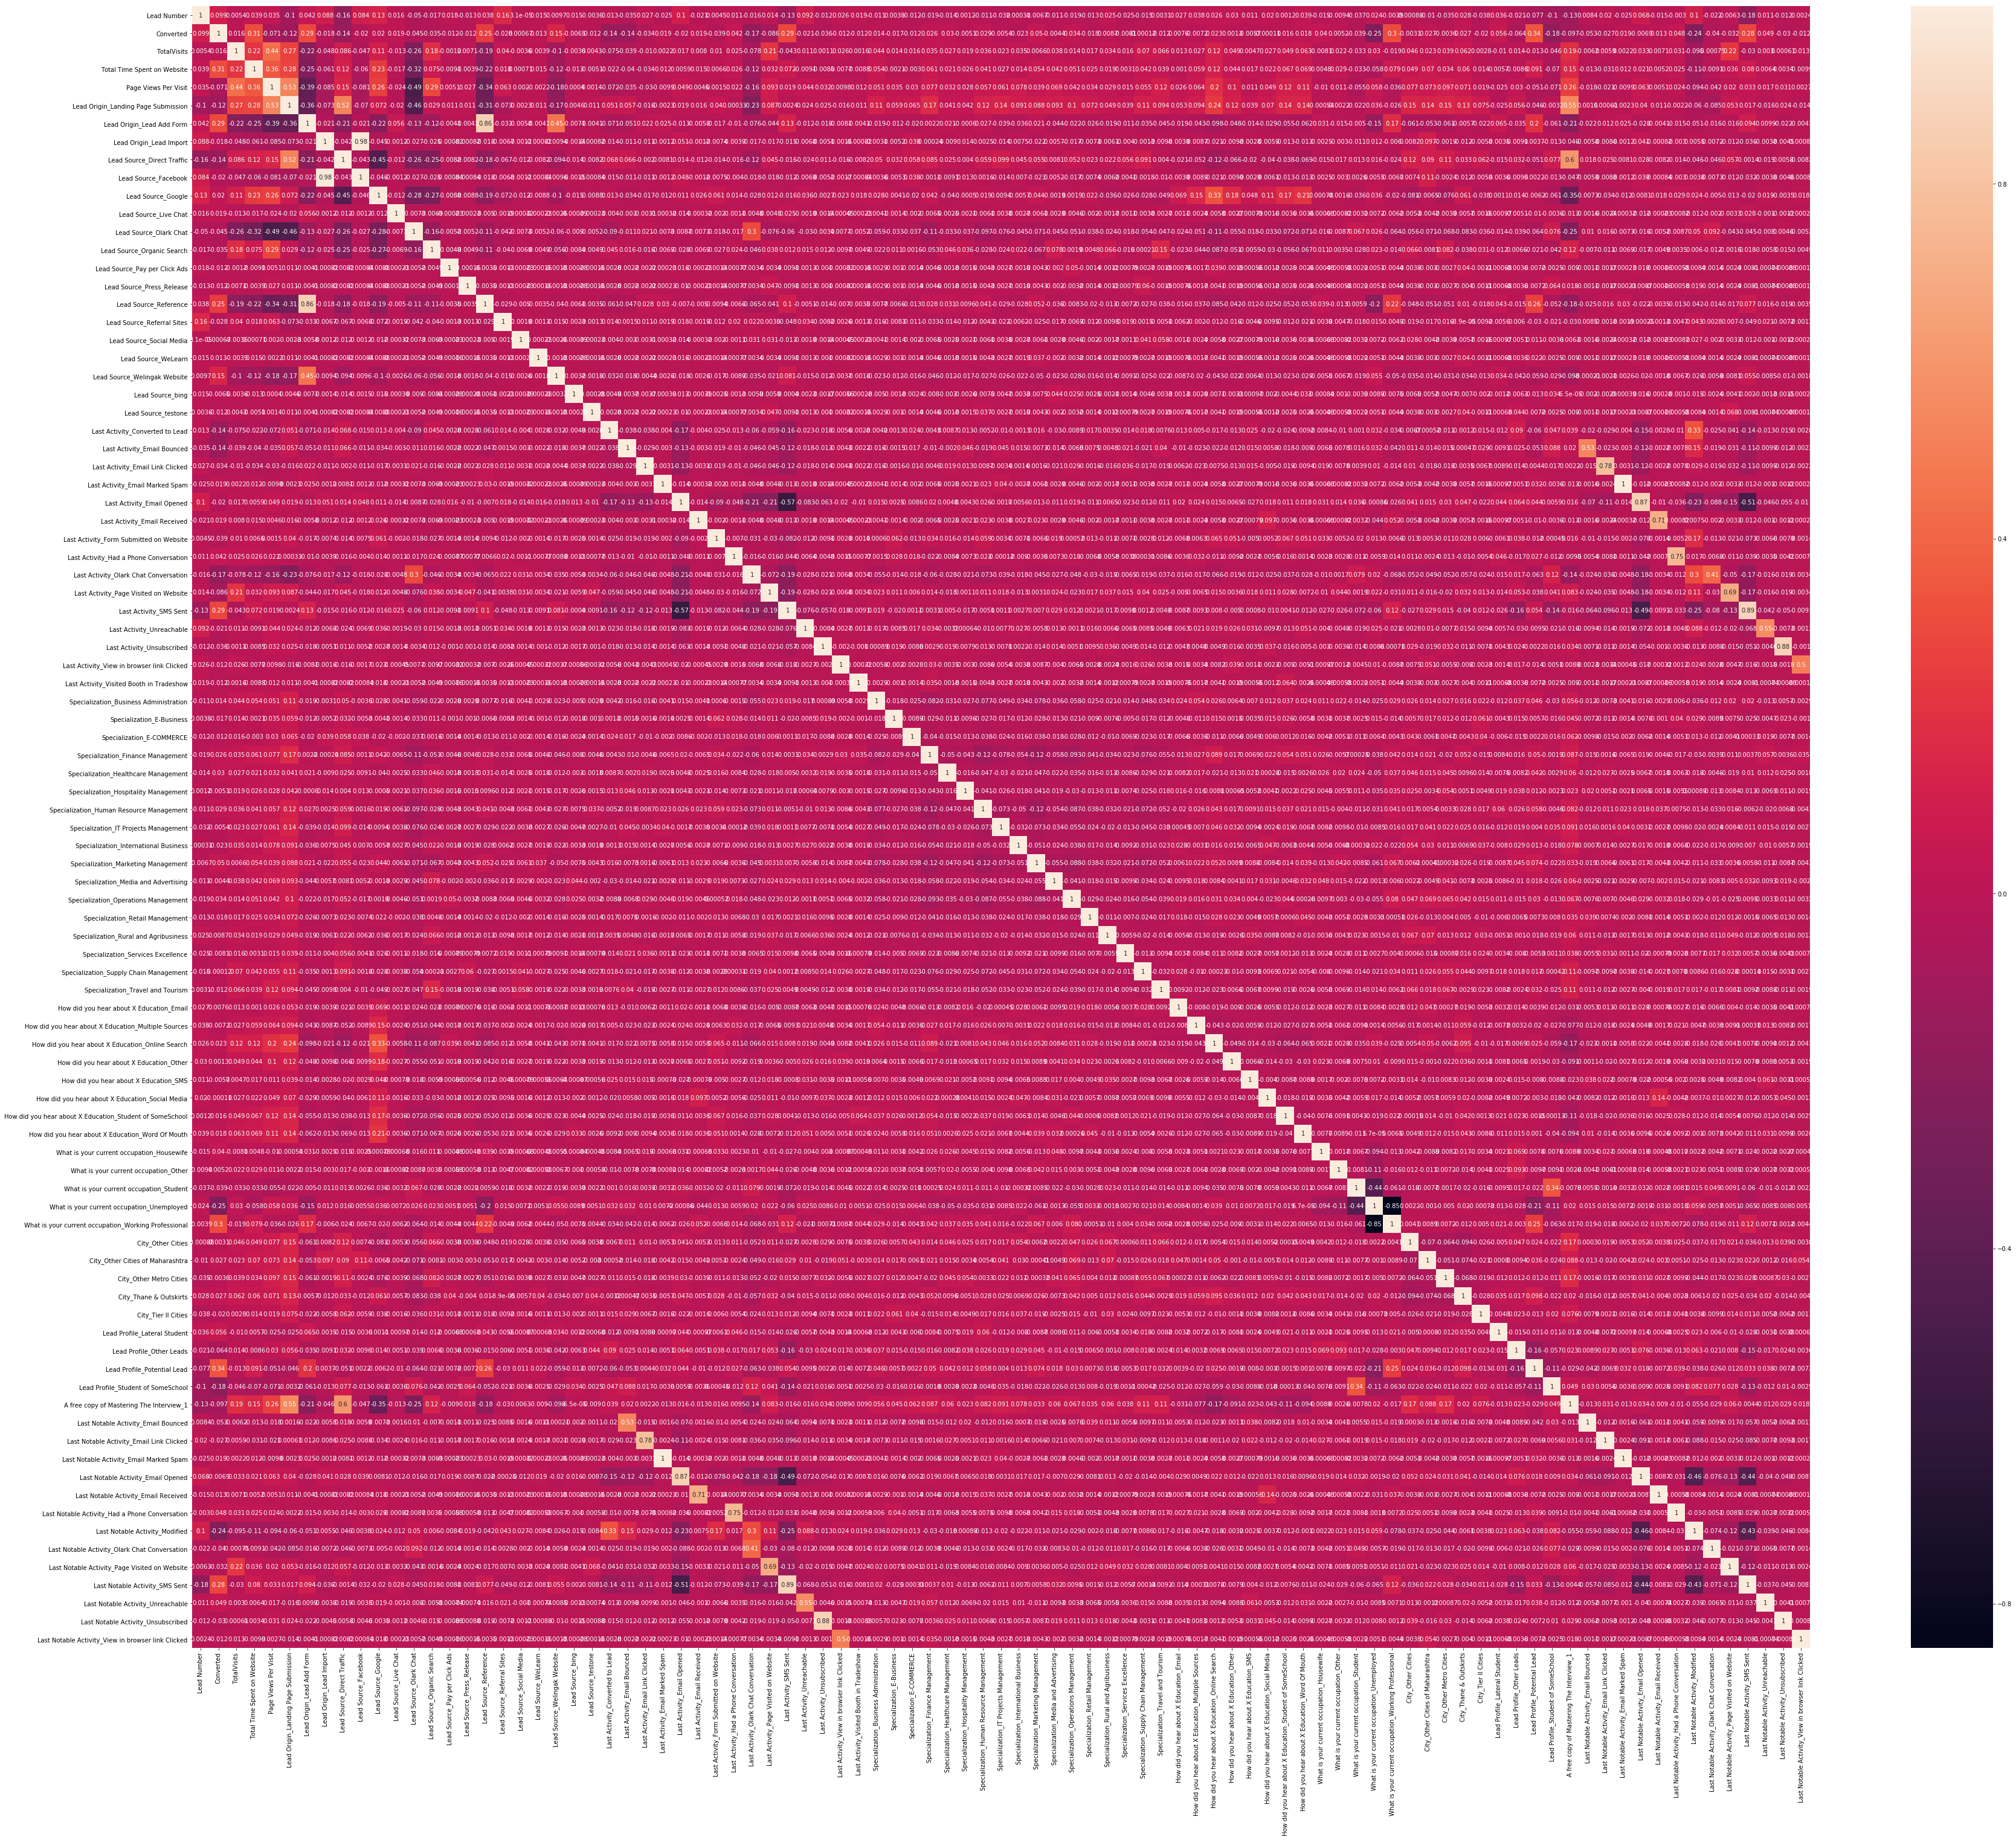

In [55]:
# Let's see the correlation matrix 
plt.figure(figsize = (60,50))        # Size of the figure
sns.heatmap(Leads.corr(),annot = True)
plt.show()

# Model Building

Running Your First Training Model

In [56]:
import statsmodels.api as sm

In [57]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4270
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        16:37:23   Pearson chi2:                 5.30e+18
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     1.427e+15   1.03e+08   1.38e+07      0.000    1.43e+15    1.43e+15
TotalVisits                                                1.04e+14   1.16e+06   8.95e+07      0.000    1.04e+14    1.04e+14
Total Time Spent on Website                               4.993e+14   1.18e+06   4.22e+08      0.000    4.99e+14    4.99e+14
Page Views Per Visit                                     -1.129e+14   1.58e+06  -7.15e+07      0.000   -1.13e+14   -1.13e+14
Lead Origin_Landing Page Submission                      -5.714e+13   4.45e+06  -1.28e+07      0.000   -5.71e+13   -5.71e+13
Lead Origin_Lead Add Form                                  2.68e+15   4.86e+07   5.52e+07      0.000    2.68e+15    2.68e+15
Lead Origin_Lead Import                                   1.283e+15    3.5e+07   3.67e+07      0.000    1.28e+15    1.28e+15
Lead Source_Direct Traffic                                2.395e+15   6.82e+07   3.51e+07      0.000     2.4e+15     2.4e+15
Lead Source_Facebook                                      1.283e+15    3.5e+07   3.67e+07      0.000    1.28e+15    1.28e+15
Lead Source_Google                                        2.583e+15   6.81e+07   3.79e+07      0.000    2.58e+15    2.58e+15
Lead Source_Live Chat                                       -3.5381   5.78e-07  -6.12e+06      0.000      -3.538      -3.538
Lead Source_Olark Chat                                    3.167e+15    6.8e+07   4.65e+07      0.000    3.17e+15    3.17e+15
Lead Source_Organic Search                                2.497e+15   6.82e+07   3.66e+07      0.000     2.5e+15     2.5e+15
Lead Source_Pay per Click Ads                            -2.147e+15   9.58e+07  -2.24e+07      0.000   -2.15e+15   -2.15e+15
Lead Source_Press_Release                                 6.116e+13   9.64e+07   6.34e+05      0.000    6.12e+13    6.12e+13
Lead Source_Reference                                     9.012e+14   4.77e+07   1.89e+07      0.000    9.01e+14    9.01e+14
Lead Source_Referral Sites                                2.376e+15   6.88e+07   3.45e+07      0.000    2.38e+15    2.38e+15
Lead Source_Social Media                                  3.439e+15   8.33e+07   4.13e+07      0.000    3.44e+15    3.44e+15
Lead Source_WeLearn                                       6.222e+15   9.58e+07   6.49e+07      0.000    6.22e+15    6.22e+15
Lead Source_Welingak Website                              1.669e+13   4.81e+07   3.47e+05      0.000    1.67e+13    1.67e+13
Lead Source_bing                                          7.655e+14   8.31e+07   9.22e+06      0.000    7.66e+14    7.66e+14
Lead Source_testone                                      -1.702e+15    9.6e+07  -1.77e+07      0.000    -1.7e+15    -1.7e+15
Last Activity_Converted to Lead      

# Feature Selection Using RFE

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [59]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [60]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False])

In [61]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 51),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 67),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 61),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 15),
 ('Lead Source_WeLearn', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 38),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 5),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 57),
 ('Last Act

In [62]:
col = X_train.columns[rfe.support_]

In [63]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMER

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4333
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1847.4
Date:                Mon, 10 Jun 2019   Deviance:                       3694.7
Time:                        16:37:27   Pearson chi2:                 4.53e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2643      0.272     -0.972      0.331      -0.797       0.269
Total Time Spent on Website                              1.1059      0.049     22.493      0.000       1.009       1.202
Lead Origin_Lead Add Form                                1.1224      1.382      0.812      0.417      -1.586       3.831
Lead Source_Olark Chat                                   1.6796      0.128     13.141      0.000       1.429       1.930
Lead Source_Reference                                    2.0768      1.400      1.484      0.138      -0.667       4.820
Lead Source_Welingak Website                             4.3632      1.557      2.802      0.005       1.311       7.416
Last Activity_Email Bounced                             -1.7250      0.419     -4.114      0.000      -2.547      -0.903
Last Activity_Had a Phone Conversation                   1.0134      0.973      1.041      0.298      -0.894       2.921
Last Activity_Olark Chat Conversation                   -0.7610      0.206     -3.692      0.000      -1.165      -0.357
Last Activity_SMS Sent                                   0.9607      0.089     10.761      0.000       0.786       1.136
Last Activity_Unsubscribed                              -1.3938      0.651     -2.140      0.032      -2.670      -0.117
Specialization_Retail Management                        -0.7407      0.366     -2.023      0.043      -1.458      -0.023
What is your current occupation_Housewife               23.1446   2.51e+04      0.001      0.999   -4.92e+04    4.93e+04
What is your current occupation_Unemployed              -0.8212      0.270     -3.037      0.002      -1.351      -0.291
What is your current occupation_Working Professional     1.4097      0.328      4.297      0.000       0.767       2.053
Lead Profile_Lateral Student                            23.0267   1.87e+04      0.001      0.999   -3.67e+04    3.67e+04
Lead Profile_Potential Lead                              1.5101      0.104     14.531      0.000       1.306       1.714
Lead Profile_Student of SomeSchool                      -2.9555      0.509     -5.812      0.000      -3.952      -1.959
Last Notable Activity_Had a Phone Conversation          22.3092   2.73e+04      0.001      0.999   -5.34e+04    5.35e+04
Last Notable Activity_Modified                          -0.7985      0.101     -7.941      0.000      -0.996      -0.601
Last Notable Activity_Unreachable                        2.5214      1.132      2.227      0.026       0.302       4.741
========================================================================================================================
"""

In [65]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8452    0.853634
6586    0.906518
3881    0.639685
7362    0.069612
8132    0.056685
7166    0.827223
2647    0.118130
1195    0.347559
7832    0.768252
6308    0.574985
dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred = y_train_pred * 100
y_train_pred[:10]

array([85.36343812, 90.65179763, 63.96848984,  6.96120431,  5.66849278,
       82.72228291, 11.81296042, 34.75586637, 76.82519838, 57.49847443])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [67]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID
0,1,85.363438,8452
1,1,90.651798,6586
2,1,63.968490,3881
3,0,6.961204,7362
4,0,5.668493,8132


Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [68]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
0,1,85.363438,8452,1
1,1,90.651798,6586,1
2,1,63.968490,3881,1
3,0,6.961204,7362,1
4,0,5.668493,8132,1


In [69]:
from sklearn import metrics

In [70]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[  36 2206]
 [   1 2111]]


In [71]:
# Predicted     not_churn    churn
# Actual
# not_churn        1853      389
# churn            469       1643  

In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.4931097841065687


# Checking VIFs

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,104.16
3,Lead Source_Reference,79.33
4,Lead Source_Welingak Website,25.72
12,What is your current occupation_Unemployed,2.58
6,Last Activity_Had a Phone Conversation,1.78
17,Last Notable Activity_Had a Phone Conversation,1.77
8,Last Activity_SMS Sent,1.74
18,Last Notable Activity_Modified,1.71
15,Lead Profile_Potential Lead,1.53
2,Lead Source_Olark Chat,1.45


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex.  So let's start by dropping that variables.

In [75]:
#col = X_train.columns[rfe.support_]

In [76]:
col = col.drop('Lead Origin_Lead Add Form', 1)
#col = col.drop('Lead Source_Reference', 1)
#col = col.drop('Lead Source_Welingak Website', 1)
col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Retail Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [77]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4334
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1847.7
Date:                Mon, 10 Jun 2019   Deviance:                       3695.4
Time:                        16:37:29   Pearson chi2:                 4.53e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2648      0.272     -0.974      0.330      -0.798       0.268
Total Time Spent on Website                              1.1050      0.049     22.499      0.000       1.009       1.201
Lead Source_Olark Chat                                   1.6788      0.128     13.146      0.000       1.428       1.929
Lead Source_Reference                                    3.1964      0.247     12.917      0.000       2.711       3.681
Lead Source_Welingak Website                             5.4841      0.723      7.589      0.000       4.068       6.900
Last Activity_Email Bounced                             -1.7272      0.419     -4.120      0.000      -2.549      -0.905
Last Activity_Had a Phone Conversation                   1.0117      0.973      1.040      0.298      -0.895       2.919
Last Activity_Olark Chat Conversation                   -0.7637      0.206     -3.706      0.000      -1.168      -0.360
Last Activity_SMS Sent                                   0.9594      0.089     10.749      0.000       0.784       1.134
Last Activity_Unsubscribed                              -1.3955      0.651     -2.143      0.032      -2.672      -0.119
Specialization_Retail Management                        -0.7421      0.366     -2.027      0.043      -1.460      -0.025
What is your current occupation_Housewife               23.1446   2.51e+04      0.001      0.999   -4.92e+04    4.93e+04
What is your current occupation_Unemployed              -0.8198      0.270     -3.032      0.002      -1.350      -0.290
What is your current occupation_Working Professional     1.4096      0.328      4.296      0.000       0.767       2.053
Lead Profile_Lateral Student                            23.3896   1.81e+04      0.001      0.999   -3.54e+04    3.55e+04
Lead Profile_Potential Lead                              1.5138      0.104     14.574      0.000       1.310       1.717
Lead Profile_Student of SomeSchool                      -2.9549      0.508     -5.811      0.000      -3.951      -1.958
Last Notable Activity_Had a Phone Conversation          22.3084   2.73e+04      0.001      0.999   -5.34e+04    5.35e+04
Last Notable Activity_Modified                          -0.7971      0.101     -7.930      0.000      -0.994      -0.600
Last Notable Activity_Unreachable                        2.5197      1.132      2.225      0.026       0.300       4.739
========================================================================================================================
"""

In [78]:
#Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.58
5,Last Activity_Had a Phone Conversation,1.78
16,Last Notable Activity_Had a Phone Conversation,1.77
7,Last Activity_SMS Sent,1.74
17,Last Notable Activity_Modified,1.71
14,Lead Profile_Potential Lead,1.53
1,Lead Source_Olark Chat,1.45
12,What is your current occupation_Working Profes...,1.45
2,Lead Source_Reference,1.37
6,Last Activity_Olark Chat Conversation,1.34


In [79]:
#drop column having high p value 'What is your current occupation_Housewife'
col = col.drop('What is your current occupation_Housewife', 1)

In [80]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4335
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1851.0
Date:                Mon, 10 Jun 2019   Deviance:                       3702.1
Time:                        16:37:30   Pearson chi2:                 4.55e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1129      0.266     -0.424      0.671      -0.635       0.409
Total Time Spent on Website                              1.1035      0.049     22.488      0.000       1.007       1.200
Lead Source_Olark Chat                                   1.6731      0.128     13.110      0.000       1.423       1.923
Lead Source_Reference                                    3.2041      0.247     12.967      0.000       2.720       3.688
Lead Source_Welingak Website                             5.4805      0.723      7.585      0.000       4.064       6.897
Last Activity_Email Bounced                             -1.7324      0.419     -4.135      0.000      -2.553      -0.911
Last Activity_Had a Phone Conversation                   1.0075      0.973      1.036      0.300      -0.899       2.914
Last Activity_Olark Chat Conversation                   -0.7698      0.206     -3.736      0.000      -1.174      -0.366
Last Activity_SMS Sent                                   0.9550      0.089     10.705      0.000       0.780       1.130
Last Activity_Unsubscribed                              -1.3958      0.651     -2.145      0.032      -2.671      -0.120
Specialization_Retail Management                        -0.7450      0.366     -2.034      0.042      -1.463      -0.027
What is your current occupation_Unemployed              -0.9678      0.265     -3.650      0.000      -1.487      -0.448
What is your current occupation_Working Professional     1.2612      0.324      3.898      0.000       0.627       1.895
Lead Profile_Lateral Student                            23.3850   1.81e+04      0.001      0.999   -3.54e+04    3.55e+04
Lead Profile_Potential Lead                              1.5083      0.104     14.534      0.000       1.305       1.712
Lead Profile_Student of SomeSchool                      -3.0201      0.508     -5.945      0.000      -4.016      -2.024
Last Notable Activity_Had a Phone Conversation          22.3110   2.73e+04      0.001      0.999   -5.34e+04    5.35e+04
Last Notable Activity_Modified                          -0.7958      0.100     -7.928      0.000      -0.993      -0.599
Last Notable Activity_Unreachable                        2.5166      1.132      2.223      0.026       0.298       4.735
========================================================================================================================
"""

In [81]:
#Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.58
5,Last Activity_Had a Phone Conversation,1.78
15,Last Notable Activity_Had a Phone Conversation,1.77
7,Last Activity_SMS Sent,1.74
16,Last Notable Activity_Modified,1.71
13,Lead Profile_Potential Lead,1.53
1,Lead Source_Olark Chat,1.45
11,What is your current occupation_Working Profes...,1.45
2,Lead Source_Reference,1.37
6,Last Activity_Olark Chat Conversation,1.34


In [82]:
#drop column having high p value 'Lead Profile_Lateral Student'
col = col.drop('Lead Profile_Lateral Student', 1)

In [83]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4336
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1858.0
Date:                Mon, 10 Jun 2019   Deviance:                       3716.1
Time:                        16:37:30   Pearson chi2:                 4.57e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1091      0.266     -0.410      0.682      -0.631       0.413
Total Time Spent on Website                              1.1034      0.049     22.557      0.000       1.008       1.199
Lead Source_Olark Chat                                   1.6685      0.127     13.111      0.000       1.419       1.918
Lead Source_Reference                                    3.2585      0.247     13.174      0.000       2.774       3.743
Lead Source_Welingak Website                             5.5259      0.722      7.649      0.000       4.110       6.942
Last Activity_Email Bounced                             -1.7416      0.419     -4.159      0.000      -2.562      -0.921
Last Activity_Had a Phone Conversation                   1.1619      0.914      1.272      0.203      -0.629       2.952
Last Activity_Olark Chat Conversation                   -0.7781      0.206     -3.779      0.000      -1.182      -0.375
Last Activity_SMS Sent                                   0.9416      0.089     10.571      0.000       0.767       1.116
Last Activity_Unsubscribed                              -1.4059      0.651     -2.161      0.031      -2.681      -0.131
Specialization_Retail Management                        -0.7490      0.366     -2.046      0.041      -1.467      -0.031
What is your current occupation_Unemployed              -0.9575      0.265     -3.609      0.000      -1.478      -0.438
What is your current occupation_Working Professional     1.2743      0.324      3.938      0.000       0.640       1.909
Lead Profile_Potential Lead                              1.4958      0.104     14.429      0.000       1.293       1.699
Lead Profile_Student of SomeSchool                      -3.0303      0.509     -5.956      0.000      -4.028      -2.033
Last Notable Activity_Had a Phone Conversation          21.1459   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
Last Notable Activity_Modified                          -0.7957      0.100     -7.948      0.000      -0.992      -0.599
Last Notable Activity_Unreachable                        2.5040      1.132      2.212      0.027       0.286       4.722
========================================================================================================================
"""

In [84]:
#drop column havign high p value (here 'Last Notable Activity_Had a Phone Conversation')
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

In [85]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4354
Model:                            GLM   Df Residuals:                     4337
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1859.2
Date:                Mon, 10 Jun 2019   Deviance:                       3718.4
Time:                        16:37:30   Pearson chi2:                 4.58e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1076      0.266     -0.404      0.686      -0.630       0.414
Total Time Spent on Website                              1.1025      0.049     22.541      0.000       1.007       1.198
Lead Source_Olark Chat                                   1.6673      0.127     13.100      0.000       1.418       1.917
Lead Source_Reference                                    3.2533      0.247     13.153      0.000       2.768       3.738
Lead Source_Welingak Website                             5.5260      0.723      7.648      0.000       4.110       6.942
Last Activity_Email Bounced                             -1.7394      0.419     -4.154      0.000      -2.560      -0.919
Last Activity_Had a Phone Conversation                   1.8340      0.772      2.377      0.017       0.322       3.346
Last Activity_Olark Chat Conversation                   -0.7739      0.206     -3.759      0.000      -1.178      -0.370
Last Activity_SMS Sent                                   0.9408      0.089     10.562      0.000       0.766       1.115
Last Activity_Unsubscribed                              -1.4074      0.651     -2.163      0.031      -2.683      -0.132
Specialization_Retail Management                        -0.7491      0.366     -2.046      0.041      -1.467      -0.032
What is your current occupation_Unemployed              -0.9574      0.265     -3.609      0.000      -1.477      -0.437
What is your current occupation_Working Professional     1.2737      0.324      3.936      0.000       0.639       1.908
Lead Profile_Potential Lead                              1.5005      0.104     14.489      0.000       1.298       1.704
Lead Profile_Student of SomeSchool                      -3.0299      0.509     -5.956      0.000      -4.027      -2.033
Last Notable Activity_Modified                          -0.8035      0.100     -8.039      0.000      -0.999      -0.608
Last Notable Activity_Unreachable                        2.5014      1.132      2.210      0.027       0.283       4.720
========================================================================================================================
"""

In [86]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [87]:
y_train_pred[:10]

array([0.85292086, 0.90547764, 0.63845577, 0.06976505, 0.05767172,
       0.82997679, 0.11744936, 0.34802499, 0.76844123, 0.57712586])

In [88]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID
0,1,0.852921,8452
1,1,0.905478,6586
2,1,0.638456,3881
3,0,0.069765,7362
4,0,0.057672,8132


In [89]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted
0,1,0.852921,8452,1
1,1,0.905478,6586,1
2,1,0.638456,3881,1
3,0,0.069765,7362,0
4,0,0.057672,8132,0


In [90]:
from sklearn import metrics

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[1850  392]
 [ 471 1641]]


In [92]:
# Predicted     not_churn    churn
# Actual
# not_churn        1807      435
# churn            581       1531  

In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.8017914561322922


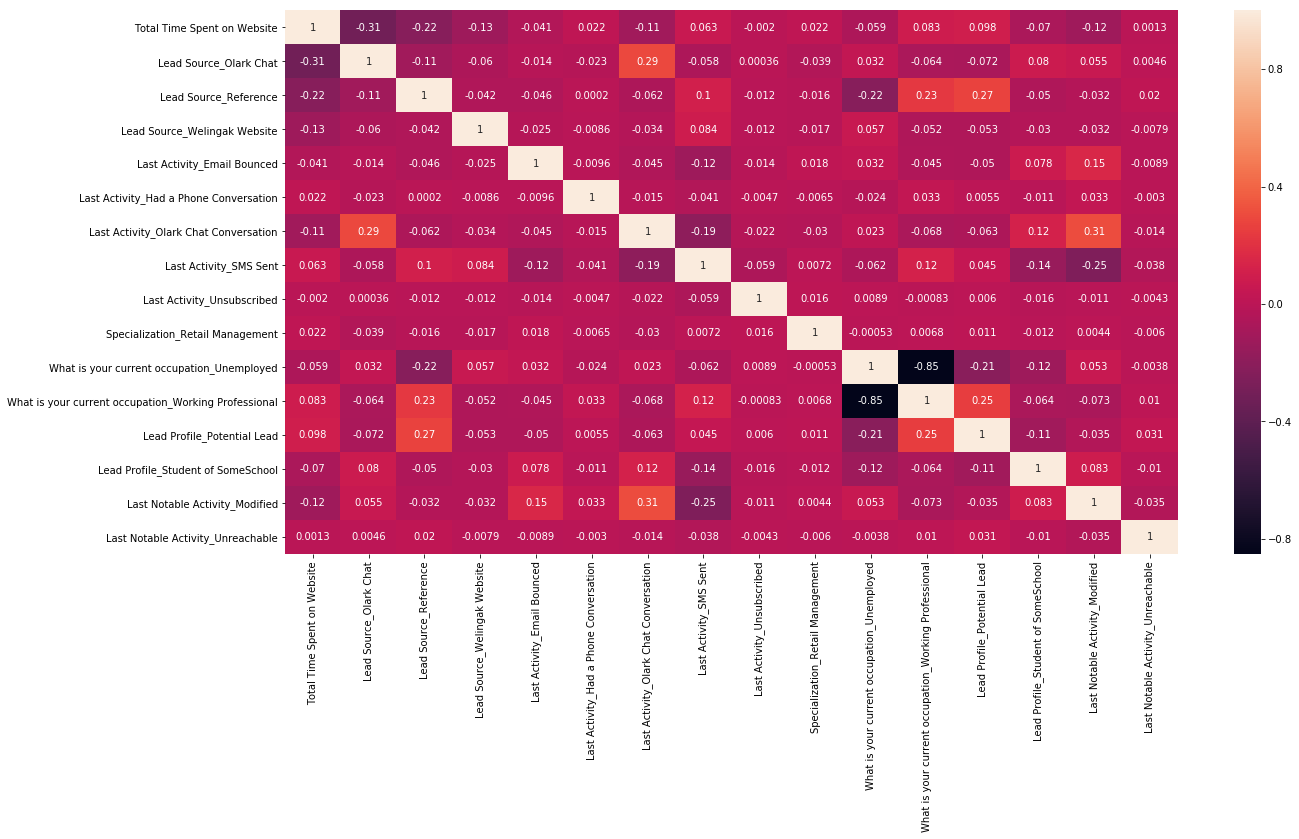

In [94]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

# Metrics beyond simply accuracy

In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7769886363636364

In [97]:
# Let us calculate specificity
TN / float(TN+FP)

0.8251561106155219

In [98]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17484388938447815


In [99]:
# positive predictive value 
print (TP / float(TP+FP))

0.8071815051647812


In [100]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7970702283498492


# Plotting the ROC Curve

An ROC curve demonstrates several things:
•It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
•The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
•The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

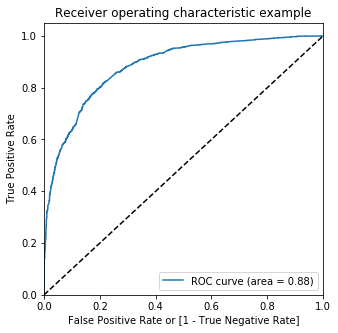

In [103]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.852921,8452,1,1,1,1,1,1,1,1,1,1,0
1,1,0.905478,6586,1,1,1,1,1,1,1,1,1,1,1
2,1,0.638456,3881,1,1,1,1,1,1,1,1,0,0,0
3,0,0.069765,7362,0,1,0,0,0,0,0,0,0,0,0
4,0,0.057672,8132,0,1,0,0,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.485071  1.000000  0.000000
0.1   0.1  0.608636  0.983902  0.255129
0.2   0.2  0.736564  0.952652  0.533006
0.3   0.3  0.779743  0.905777  0.661017
0.4   0.4  0.801102  0.823390  0.780107
0.5   0.5  0.801791  0.776989  0.825156
0.6   0.6  0.793064  0.717330  0.864407
0.7   0.7  0.766422  0.605114  0.918376
0.8   0.8  0.733349  0.491951  0.960749
0.9   0.9  0.668351  0.330019  0.987065


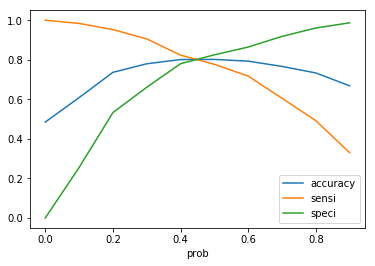

In [168]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()
fig.savefig('threshold.png')

From the curve above, 0.42 is the optimum point to take it as a cutoff probability

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Conversion,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.852921,8452,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.905478,6586,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.638456,3881,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.069765,7362,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.057672,8132,0,1,0,0,0,0,0,0,0,0,0,0


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.8015617822691777

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)
confusion2

array([[1770,  472],
       [ 392, 1720]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8143939393939394

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.7894736842105263

In [113]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21052631578947367


In [114]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7846715328467153


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.818686401480111


# Precision and Recall

In [116]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
confusion

array([[1850,  392],
       [ 471, 1641]], dtype=int64)

Precision

TP / TP + FP


In [117]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8071815051647812

Recall

TP / TP + FN


In [118]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7769886363636364

Using sklearn utilities for the same

In [119]:
from sklearn.metrics import precision_score, recall_score

In [120]:
?precision_score

In [121]:
precision_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.8071815051647812

In [122]:
recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted)

0.7769886363636364

# Precision and recall tradeoff

In [123]:
from sklearn.metrics import precision_recall_curve

In [124]:
y_train_pred_final.Conversion, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       0
 4       0
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      1
 12      0
 13      0
 14      1
 15      0
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      1
 25      0
 26      0
 27      0
 28      0
 29      0
        ..
 4324    1
 4325    0
 4326    0
 4327    1
 4328    0
 4329    1
 4330    1
 4331    0
 4332    0
 4333    0
 4334    1
 4335    0
 4336    0
 4337    1
 4338    0
 4339    0
 4340    1
 4341    0
 4342    0
 4343    0
 4344    0
 4345    0
 4346    1
 4347    0
 4348    0
 4349    0
 4350    1
 4351    0
 4352    0
 4353    1
 Name: Conversion, Length: 4354, dtype: int64, 0       1
 1       1
 2       1
 3       0
 4       0
 5       1
 6       0
 7       0
 8       1
 9       1
 10      0
 11      1
 12      0
 13      0
 14      1
 15      0
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25     

In [125]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

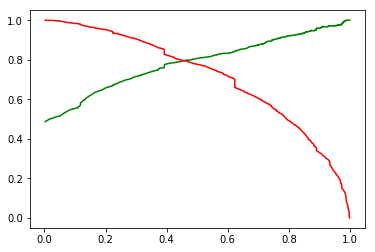

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Here, threshold value is around 4.2 which is equal to the optimum point of cut of probability. So we are keeping this model

# Making predictions on the test set

In [127]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2043,-0.297581,1.793707,-0.182469,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8169,0.090402,-0.652250,0.961434,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4636,-0.297581,-0.548280,-0.182469,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6793,-0.685564,-0.944778,-1.326371,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5080,-0.103590,1.434215,0.389483,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [128]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Retail Management,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Unreachable
2043,1.793707,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
8169,-0.652250,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4636,-0.548280,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6793,-0.944778,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5080,1.434215,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [129]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [130]:
#Making prediction
y_test_pred = res.predict(X_test_sm)

In [131]:
y_test_pred[:10]

2043    0.990473
8169    0.300823
4636    0.158488
6793    0.391892
5080    0.626238
6159    0.115402
482     0.863379
7805    0.909739
1284    0.586079
2809    0.883935
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head
y_pred_1.head()

,0
2043,0.990473
8169,0.300823
4636,0.158488
6793,0.391892
5080,0.626238


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [138]:
y_pred_final.head()

,Converted,LeadID,0
0,1,2043,0.990473
1,0,8169,0.300823
2,0,4636,0.158488
3,0,6793,0.391892
4,1,5080,0.626238


In [139]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [140]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

In [141]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,2043,1,0.990473
1,8169,0,0.300823
2,4636,0,0.158488
3,6793,0,0.391892
4,5080,1,0.626238


In [142]:
y_pred_final.shape

(1866, 3)

In [143]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [144]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,2043,1,0.990473,1
1,8169,0,0.300823,0
2,4636,0,0.158488,0
3,6793,0,0.391892,0
4,5080,1,0.626238,1


In [145]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_score

0.8027867095391211

In [146]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[777 207]
 [161 721]]


In [147]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8174603174603174

In [149]:
# Let us calculate specificity
TN / float(TN+FP)

0.7896341463414634

In [150]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.21036585365853658


In [151]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7769396551724138


In [152]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8283582089552238


In [153]:
#precision
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7769396551724138

In [154]:
#recall
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.8174603174603174

In [155]:
from sklearn.metrics import precision_recall_curve

In [156]:
y_pred_final.Converted, y_pred_final.final_predicted

(0       1
 1       0
 2       0
 3       0
 4       1
 5       0
 6       1
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      0
 14      1
 15      0
 16      1
 17      1
 18      0
 19      0
 20      0
 21      0
 22      1
 23      1
 24      1
 25      1
 26      0
 27      0
 28      0
 29      0
        ..
 1836    0
 1837    1
 1838    1
 1839    1
 1840    1
 1841    0
 1842    1
 1843    1
 1844    0
 1845    0
 1846    1
 1847    0
 1848    0
 1849    0
 1850    0
 1851    0
 1852    1
 1853    1
 1854    0
 1855    1
 1856    0
 1857    0
 1858    1
 1859    0
 1860    1
 1861    0
 1862    1
 1863    0
 1864    1
 1865    1
 Name: Converted, Length: 1866, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       1
 5       0
 6       1
 7       1
 8       1
 9       1
 10      1
 11      0
 12      1
 13      1
 14      1
 15      0
 16      1
 17      0
 18      0
 19      0
 20      0
 21      0
 22      1
 23      1
 24      1
 25      

In [157]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

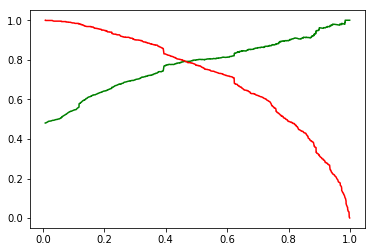

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Plotting the ROC Curve 

In [159]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [160]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

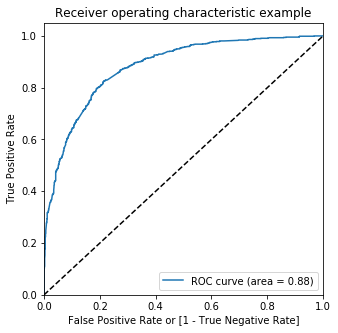

(array([0.        , 0.        , 0.        , ..., 0.99796748, 0.99898374,
        1.        ]),
 array([0.00113379, 0.00226757, 0.00340136, ..., 1.        , 1.        ,
        1.        ]),
 array([9.99103011e-01, 9.98771364e-01, 9.98376160e-01, ...,
        5.19086179e-04, 5.12078240e-04, 4.91616718e-04]))

In [161]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [162]:
#lead score for customer in the range 0-100
y_test_pred = y_test_pred * 100
y_test_pred[:10]

2043    99.047344
8169    30.082313
4636    15.848772
6793    39.189190
5080    62.623798
6159    11.540216
482     86.337937
7805    90.973900
1284    58.607913
2809    88.393498
dtype: float64

In [163]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                             1.10
Lead Source_Olark Chat                                  1.67
Lead Source_Reference                                   3.25
Lead Source_Welingak Website                            5.53
Last Activity_Email Bounced                            -1.74
Last Activity_Had a Phone Conversation                  1.83
Last Activity_Olark Chat Conversation                  -0.77
Last Activity_SMS Sent                                  0.94
Last Activity_Unsubscribed                             -1.41
Specialization_Retail Management                       -0.75
What is your current occupation_Unemployed             -0.96
What is your current occupation_Working Professional    1.27
Lead Profile_Potential Lead                             1.50
Lead Profile_Student of SomeSchool                     -3.03
Last Notable Activity_Modified                         -0.80
Last Notable Activity_Unreachable                       2.50
dtype: float64

In [164]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                             19.95
Lead Source_Olark Chat                                  30.17
Lead Source_Reference                                   58.87
Lead Source_Welingak Website                           100.00
Last Activity_Email Bounced                            -31.48
Last Activity_Had a Phone Conversation                  33.19
Last Activity_Olark Chat Conversation                  -14.01
Last Activity_SMS Sent                                  17.02
Last Activity_Unsubscribed                             -25.47
Specialization_Retail Management                       -13.56
What is your current occupation_Unemployed             -17.33
What is your current occupation_Working Professional    23.05
Lead Profile_Potential Lead                             27.15
Lead Profile_Student of SomeSchool                     -54.83
Last Notable Activity_Modified                         -14.54
Last Notable Activity_Unreachable                       45.27
dtype: f

In [165]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                             13
Lead Source_Olark Chat                                   4
Lead Source_Reference                                    8
Lead Source_Welingak Website                            10
Last Activity_Email Bounced                             14
Last Activity_Had a Phone Conversation                   6
Last Activity_Olark Chat Conversation                    9
Last Activity_SMS Sent                                   7
Last Activity_Unsubscribed                               0
Specialization_Retail Management                        11
What is your current occupation_Unemployed              12
What is your current occupation_Working Professional     1
Lead Profile_Potential Lead                              5
Lead Profile_Student of SomeSchool                      15
Last Notable Activity_Modified                           2
Last Notable Activity_Unreachable                        3
dtype: int64

<Figure size 864x576 with 0 Axes>

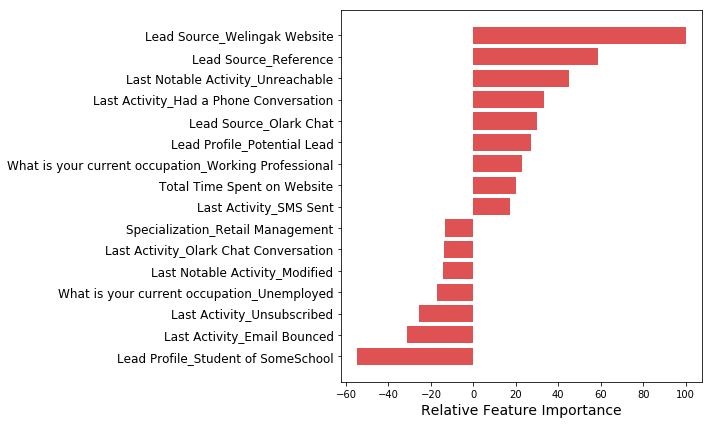

In [166]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()
fig.savefig('Question1.png')